# Imports & Merging

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re
import os

In [2]:
path = 'csv\\'
files = [file for file in os.listdir(path) if file.endswith(".csv")]

output = pd.Series(name="Rows", dtype=int)
for file in files:
    df = pd.read_csv(os.path.join(path, file))
    output.at[file.replace(".csv", "")] = df.shape[0]
output.at["Total"] = output.sum()

In [3]:
output

database0-500            436
database1000-2000        865
database10000-10200      147
database10200-10300       84
database10300-10400       81
                       ...  
database9600-9700         82
database9700-9800         81
database9800-9900         80
database9900-10000        77
Total                  52422
Name: Rows, Length: 359, dtype: int64

In [4]:
import warnings
warnings.filterwarnings('ignore') # to ignore a deprecated method warning
result = Path('csv\\').glob('*.csv')
csvfiles = sorted(result, key = lambda x: [int(k) if k.isdigit() else k for k in re.split('([0-9]+)', x.stem)])

df = pd.DataFrame()
for files in csvfiles:
    df = df.append(pd.read_csv(files))
df.to_csv('main.csv')

In [5]:
df

,URL,Green Hosting,Bytes,Cleaner Than %,Stats_Adjusted Bytes,Stats_Energy,Stats_CO2_Grid_Grams,Stats_CO2_Grid_Litres,Stats_CO2_Renewable_Grams,Stats_CO2_Renewable_Litres
https://www.google.com/,True,170821,0.96,1.289699e+05,0.000097,0.043003,0.023918,0.037282,0.020736,1651677726
https://www.youtube.com/,True,3543405,0.32,2.675271e+06,0.002018,0.892021,0.496142,0.773354,0.430140,1651668187
https://www.facebook.com/,True,435816,0.91,3.290411e+05,0.000248,0.109713,0.061022,0.095118,0.052904,1651677735
https://www.netflix.com/fr-en/,True,2004776,0.54,1.513606e+06,0.001142,0.504685,0.280706,0.437546,0.243363,1651677748
https://www.microsoft.com/fr-fr/,unknown,768548,0.80,5.802537e+05,0.000438,0.193475,0.107611,0.167737,0.093295,1651677764
...,...,...,...,...,...,...,...,...,...,...
https://genericsildenafil.online/,True,35581,0.99,2.686365e+04,0.000020,0.008957,0.004982,0.007766,0.004319,1653145171
https://www.myamcat.com/,unknown,37919212,0.01,2.862901e+07,0.021597,9.545830,5.309390,8.275932,4.603073,1653145180
https://nobaproject.com/,True,1859882,0.57,1.404211e+06,0.001059,0.468209,0.260418,0.405922,0.225774,1653145161
https://govst.edu/,unknown,19112240,0.03,1.442974e+07,0.010885,4.811339,2.676067,4.171279,2.320065,1653145213


In [6]:
df = pd.read_csv('main.csv', index_col=None)

# Editing

In [7]:
df.columns = ['URL', 'Green Hosting', 'Bytes', 'Cleaner Than %', "Statistics: Adjusted Bytes", "Statistics: Energy (KWG)", "Statistics: CO2 Grams, Grid", "Statistics: CO2 Litres, Grid", "Statistics: CO2 Grams, Renewable", "Statistics: CO2 Litres, Renewable", "Gathered At:"]

In [8]:
df = df.drop_duplicates(subset=['URL'], keep='first')

In [9]:
df.isna().sum()

URL                                  0
Green Hosting                        0
Bytes                                0
Cleaner Than %                       0
Statistics: Adjusted Bytes           0
Statistics: Energy (KWG)             0
Statistics: CO2 Grams, Grid          0
Statistics: CO2 Litres, Grid         0
Statistics: CO2 Grams, Renewable     0
Statistics: CO2 Litres, Renewable    0
Gathered At:                         0
dtype: int64

In [10]:
df["Cleaner Than %"] = df["Cleaner Than %"].apply(lambda x: x*100)

In [11]:
df["Gathered At:"] = pd.to_datetime(df['Gathered At:'], unit='s')

In [12]:
df["Green Hosting"] = np.where(df["Green Hosting"] == "unknown", 'False', 'True')

In [13]:
df.to_csv('main.csv')

In [14]:
df.at[48594,'URL']='http://www.nontonanimeid.moe/'

# Analysis

In [15]:
df["Green Hosting"].value_counts()

False    25708
True     24326
Name: Green Hosting, dtype: int64

In [16]:
df.describe()

,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,Statistics: Energy (KWG),"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Renewable"
count,5.003400e+04,50034.000000,5.003400e+04,5.003400e+04,50034.000000,50034.000000,50034.000000,50034.000000
mean,3.696112e+06,49.154275,2.790564e+06,2.105122e-03,0.930464,0.517524,0.806683,0.448677
std,5.847474e+06,28.671194,4.414843e+06,3.330431e-03,1.472050,0.818754,1.276221,0.709834
min,1.680000e+02,0.000000,1.268400e+02,9.568445e-08,0.000042,0.000024,0.000037,0.000020
25%,1.055308e+06,25.000000,7.967572e+05,6.010507e-04,0.265664,0.147763,0.230323,0.128105
50%,2.236138e+06,46.000000,1.688285e+06,1.273593e-03,0.562928,0.313101,0.488041,0.271448
75%,4.229322e+06,73.000000,3.193138e+06,2.408812e-03,1.064695,0.592183,0.923057,0.513404
max,3.040842e+08,100.000000,2.295836e+08,1.731912e-01,76.550528,42.577404,66.366883,36.913260


In [17]:
df.mean()

Bytes                                3.696112e+06
Cleaner Than %                       4.915428e+01
Statistics: Adjusted Bytes           2.790564e+06
Statistics: Energy (KWG)             2.105122e-03
Statistics: CO2 Grams, Grid          9.304637e-01
Statistics: CO2 Litres, Grid         5.175239e-01
Statistics: CO2 Grams, Renewable     8.066826e-01
Statistics: CO2 Litres, Renewable    4.486769e-01
dtype: float64

In [18]:
df.median()

Bytes                                2.236138e+06
Cleaner Than %                       4.600000e+01
Statistics: Adjusted Bytes           1.688285e+06
Statistics: Energy (KWG)             1.273593e-03
Statistics: CO2 Grams, Grid          5.629283e-01
Statistics: CO2 Litres, Grid         3.131007e-01
Statistics: CO2 Grams, Renewable     4.880410e-01
Statistics: CO2 Litres, Renewable    2.714484e-01
dtype: float64

In [19]:
df.sum()

URL                                  https://www.google.com/https://www.youtube.com...
Green Hosting                        TrueTrueTrueTrueFalseTrueFalseFalseFalseFalseF...
Bytes                                                                     184931250547
Cleaner Than %                                                               2459385.0
Statistics: Adjusted Bytes                                         139623094162.984985
Statistics: Energy (KWG)                                                    105.327653
Statistics: CO2 Grams, Grid                                               46554.822635
Statistics: CO2 Litres, Grid                                               25893.79235
Statistics: CO2 Grams, Renewable                                          40361.556638
Statistics: CO2 Litres, Renewable                                         22449.097802
dtype: object

In [20]:
max = df["Statistics: Adjusted Bytes"].max()
df[df["Statistics: Adjusted Bytes"] == max]

,URL,Green Hosting,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,Statistics: Energy (KWG),"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Renewable",Gathered At:
41527,https://lematin.ma/,True,304084175,0.0,2.295836e+08,0.173191,76.550528,42.577404,66.366883,36.91326,2022-05-15 12:40:01


In [21]:
min = df["Statistics: Adjusted Bytes"].min()
df[df["Statistics: Adjusted Bytes"] == min]

,URL,Green Hosting,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,Statistics: Energy (KWG),"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Renewable",Gathered At:
40633,https://bloog.pl/,False,168,100.0,126.84,9.568445e-08,0.000042,0.000024,0.000037,0.00002,2022-05-15 10:05:15


In [22]:
dfmax = df.sort_values(['Bytes'], ascending=False).groupby('Bytes').tail(2)
dfmin = df.sort_values(['Bytes'], ascending=True).groupby('Bytes').tail(2)

In [78]:
# dfmax.head(15)

,URL,Green Hosting,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,Statistics: Energy (KWG),"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Renewable",Gathered At:
41527,https://lematin.ma/,True,304084175,0.0,2.295836e+08,0.173191,76.550528,42.577404,66.366883,36.913260,2022-05-15 12:40:01
40959,https://porno-island.site/,True,221431538,0.0,1.671808e+08,0.126116,55.743450,31.004507,48.327806,26.879926,2022-05-15 10:19:45
36484,https://warnerbrosgames.com/,False,174746287,0.0,1.319334e+08,0.099527,43.990847,24.467709,38.138671,21.212729,2022-05-14 10:05:08
39068,https://www.cuntempire.com/,False,173488420,0.0,1.309838e+08,0.098810,43.674190,24.291585,37.864140,21.060034,2022-05-14 13:04:43
18209,https://www.ittefaq.com.bd/,True,158429770,0.0,1.196145e+08,0.090234,39.883307,22.183095,34.577564,19.232041,2022-05-06 14:01:03
20720,https://vnexplorer.net/,False,153772730,0.0,1.160984e+08,0.087581,38.710938,21.531024,33.561157,18.666716,2022-05-06 19:19:45
22691,https://www.xdraco.com/,False,144149539,0.0,1.088329e+08,0.082100,36.288384,20.183599,31.460879,17.498541,2022-05-07 09:09:13
43628,https://www.mbs1179.com/,False,131234648,0.0,9.908216e+07,0.074745,33.037173,18.375276,28.642183,15.930782,2022-05-17 09:41:45
2593,https://2m.ma/ar,True,110049081,1.0,8.308706e+07,0.062678,27.703892,15.408905,24.018397,13.359032,2022-05-04 17:34:15
47472,https://www.tucao.in/,True,103846179,1.0,7.840387e+07,0.059146,26.142366,14.540384,22.664603,12.606052,2022-05-19 12:00:56


In [56]:
# dfmin.head(40)

,URL,Green Hosting,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,Statistics: Energy (KWG),"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Renewable",Gathered At:
40633,https://bloog.pl/,False,168,100.0,126.840,9.568445e-08,0.000042,0.000024,0.000037,0.000020,2022-05-15 10:05:15
1594,https://cunhua.shop/,False,170,100.0,128.350,9.682355e-08,0.000043,0.000024,0.000037,0.000021,2022-05-04 15:50:50
24137,https://netsecurity.ne.jp/,False,185,100.0,139.675,1.053668e-07,0.000047,0.000026,0.000040,0.000022,2022-05-07 10:45:56
25294,https://sw-themes.com/,False,200,100.0,151.000,1.139101e-07,0.000050,0.000028,0.000044,0.000024,2022-05-10 16:14:31
20385,https://apolloprogram.io/,False,207,100.0,156.285,1.178969e-07,0.000052,0.000029,0.000045,0.000025,2022-05-06 19:17:59
8976,https://wz.cz/,False,209,100.0,157.795,1.190360e-07,0.000053,0.000029,0.000046,0.000025,2022-05-05 11:46:41
23324,https://rnu.tn/,False,209,100.0,157.795,1.190360e-07,0.000053,0.000029,0.000046,0.000025,2022-05-07 09:44:59
49296,https://mywebzi.ir/,False,218,100.0,164.590,1.241620e-07,0.000055,0.000031,0.000048,0.000026,2022-05-20 08:43:11
43849,https://offerstrack.net/,False,227,100.0,171.385,1.292879e-07,0.000057,0.000032,0.000050,0.000028,2022-05-17 10:04:25
11097,https://gooddaywith-captcha.top/,False,230,100.0,173.650,1.309966e-07,0.000058,0.000032,0.000050,0.000028,2022-05-05 17:12:02


In [25]:
dfmax1 = dfmax[["URL", "Bytes"]].copy()
dfmax1 = dfmax1.head(10)
dfmin1 = dfmin[["URL", "Bytes"]].copy()
dfmin1 = dfmin1.head(10)

In [84]:
trues = df[df['Green Hosting'] == 'True']
falses = df[df['Green Hosting'] != 'True']

In [87]:
# trues.head(20)

,URL,Green Hosting,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,Statistics: Energy (KWG),"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Renewable",Gathered At:,tld
0,https://www.google.com/,True,170821,96.0,128969.855,0.000097,0.043003,0.023918,0.037282,0.020736,2022-05-04 15:22:06,com
1,https://www.youtube.com/,True,3543405,32.0,2675270.775,0.002018,0.892021,0.496142,0.773354,0.430140,2022-05-04 12:43:07,com
2,https://www.facebook.com/,True,435816,91.0,329041.080,0.000248,0.109713,0.061022,0.095118,0.052904,2022-05-04 15:22:15,com
3,https://www.netflix.com/fr-en/,True,2004776,54.0,1513605.880,0.001142,0.504685,0.280706,0.437546,0.243363,2022-05-04 15:22:28,com
5,https://www.instagram.com/accounts/login/,True,1294778,69.0,977557.390,0.000737,0.325949,0.181293,0.282587,0.157175,2022-05-04 17:13:19,com
21,https://www.youtube.com/?feature=youtu.be,True,3442280,34.0,2598921.400,0.001961,0.866564,0.481983,0.751283,0.417864,2022-05-04 15:24:42,com
23,https://vimeo.com/,True,697539,85.0,526641.945,0.000397,0.175599,0.097668,0.152239,0.084675,2022-05-04 15:25:29,com
25,https://www.adobe.com/,True,1706764,60.0,1288606.820,0.000972,0.429663,0.238978,0.372504,0.207187,2022-05-04 15:24:30,com
27,https://developers.googleblog.com/2018/03/tran...,True,375315,92.0,283362.825,0.000214,0.094482,0.052551,0.081913,0.045560,2022-05-04 15:24:25,com
28,https://marketingplatform.google.com/about/ent...,True,730222,85.0,551317.610,0.000416,0.183827,0.102245,0.159372,0.088643,2022-05-04 15:24:26,com


In [88]:
# falses.head(20)

,URL,Green Hosting,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,Statistics: Energy (KWG),"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Renewable",Gathered At:,tld
4,https://www.microsoft.com/fr-fr/,False,768548,80.0,580253.740,0.000438,0.193475,0.107611,0.167737,0.093295,2022-05-04 15:22:44,com
6,https://twitter.com/,False,1612252,57.0,1217250.260,0.000918,0.405870,0.225745,0.351877,0.195714,2022-05-04 15:24:30,com
7,https://www.baidu.com/,False,343366,92.0,259241.330,0.000196,0.086439,0.048078,0.074940,0.041682,2022-05-04 15:24:47,com
8,https://www.linkedin.com/,False,413977,90.0,312552.635,0.000236,0.104215,0.057964,0.090351,0.050253,2022-05-04 15:24:31,com
9,https://www.wikipedia.org/,False,72928,98.0,55060.640,0.000042,0.018359,0.010211,0.015917,0.008853,2022-05-04 15:24:23,org
10,https://www.apple.com/,False,1584056,58.0,1195962.280,0.000902,0.398772,0.221797,0.345723,0.192291,2022-05-04 15:24:29,com
11,https://www.yahoo.com/,False,2017477,48.0,1523195.135,0.001149,0.507882,0.282484,0.440318,0.244905,2022-05-04 15:24:37,com
12,https://www.bilibili.com/,False,2218311,44.0,1674824.805,0.001263,0.558440,0.310605,0.484150,0.269284,2022-05-04 15:24:51,com
13,https://www.qq.com/,False,1110923,69.0,838746.865,0.000633,0.279665,0.155550,0.242461,0.134857,2022-05-04 15:24:40,com
14,https://www.amazon.com/,False,3080593,32.0,2325847.715,0.001755,0.775512,0.431340,0.672345,0.373958,2022-05-04 15:24:40,com


In [141]:
df_trues = trues.sort_values(['Bytes'], ascending=False).groupby('Bytes').tail(2)
df_falses = falses.sort_values(['Bytes'], ascending=True).groupby('Bytes').tail(2)

In [142]:
df_trues = df_trues[df_trues['Bytes'] >= 10000000]
df_trues.Bytes.sum()
df_trues.Bytes.count()

1407

In [143]:
df_falses = df_falses[df_falses['Bytes'] >= 10000000]
df_falses.Bytes.sum()
df_falses.Bytes.count()

1935

# Tables

### For "Overview"

In [26]:
from tld import get_tld

df['tld'] = df['URL'].apply(lambda x: get_tld(x))

In [27]:
df['tld'] = df['tld'].astype(str)

In [28]:
df['tld'].value_counts()

com         27873
org          3868
net          2065
edu           921
ru            914
            ...  
or.id           1
com.es          1
xn--p1ai        1
garden          1
edu.mo          1
Name: tld, Length: 716, dtype: int64

In [29]:
df1 = df.groupby('tld').filter(lambda d: len(d) > 100)

In [30]:
tld = df['tld'].value_counts()

In [31]:
tld.to_excel('tld.xlsx')

In [32]:
# plt.figure(figsize=(10,10), dpi=300)
# plt.suptitle('Top Level Domain', fontsize=12)
# plt.pie(df1['tld'].value_counts(), labels=df1['tld'].value_counts().index, autopct='%1.1f%%')

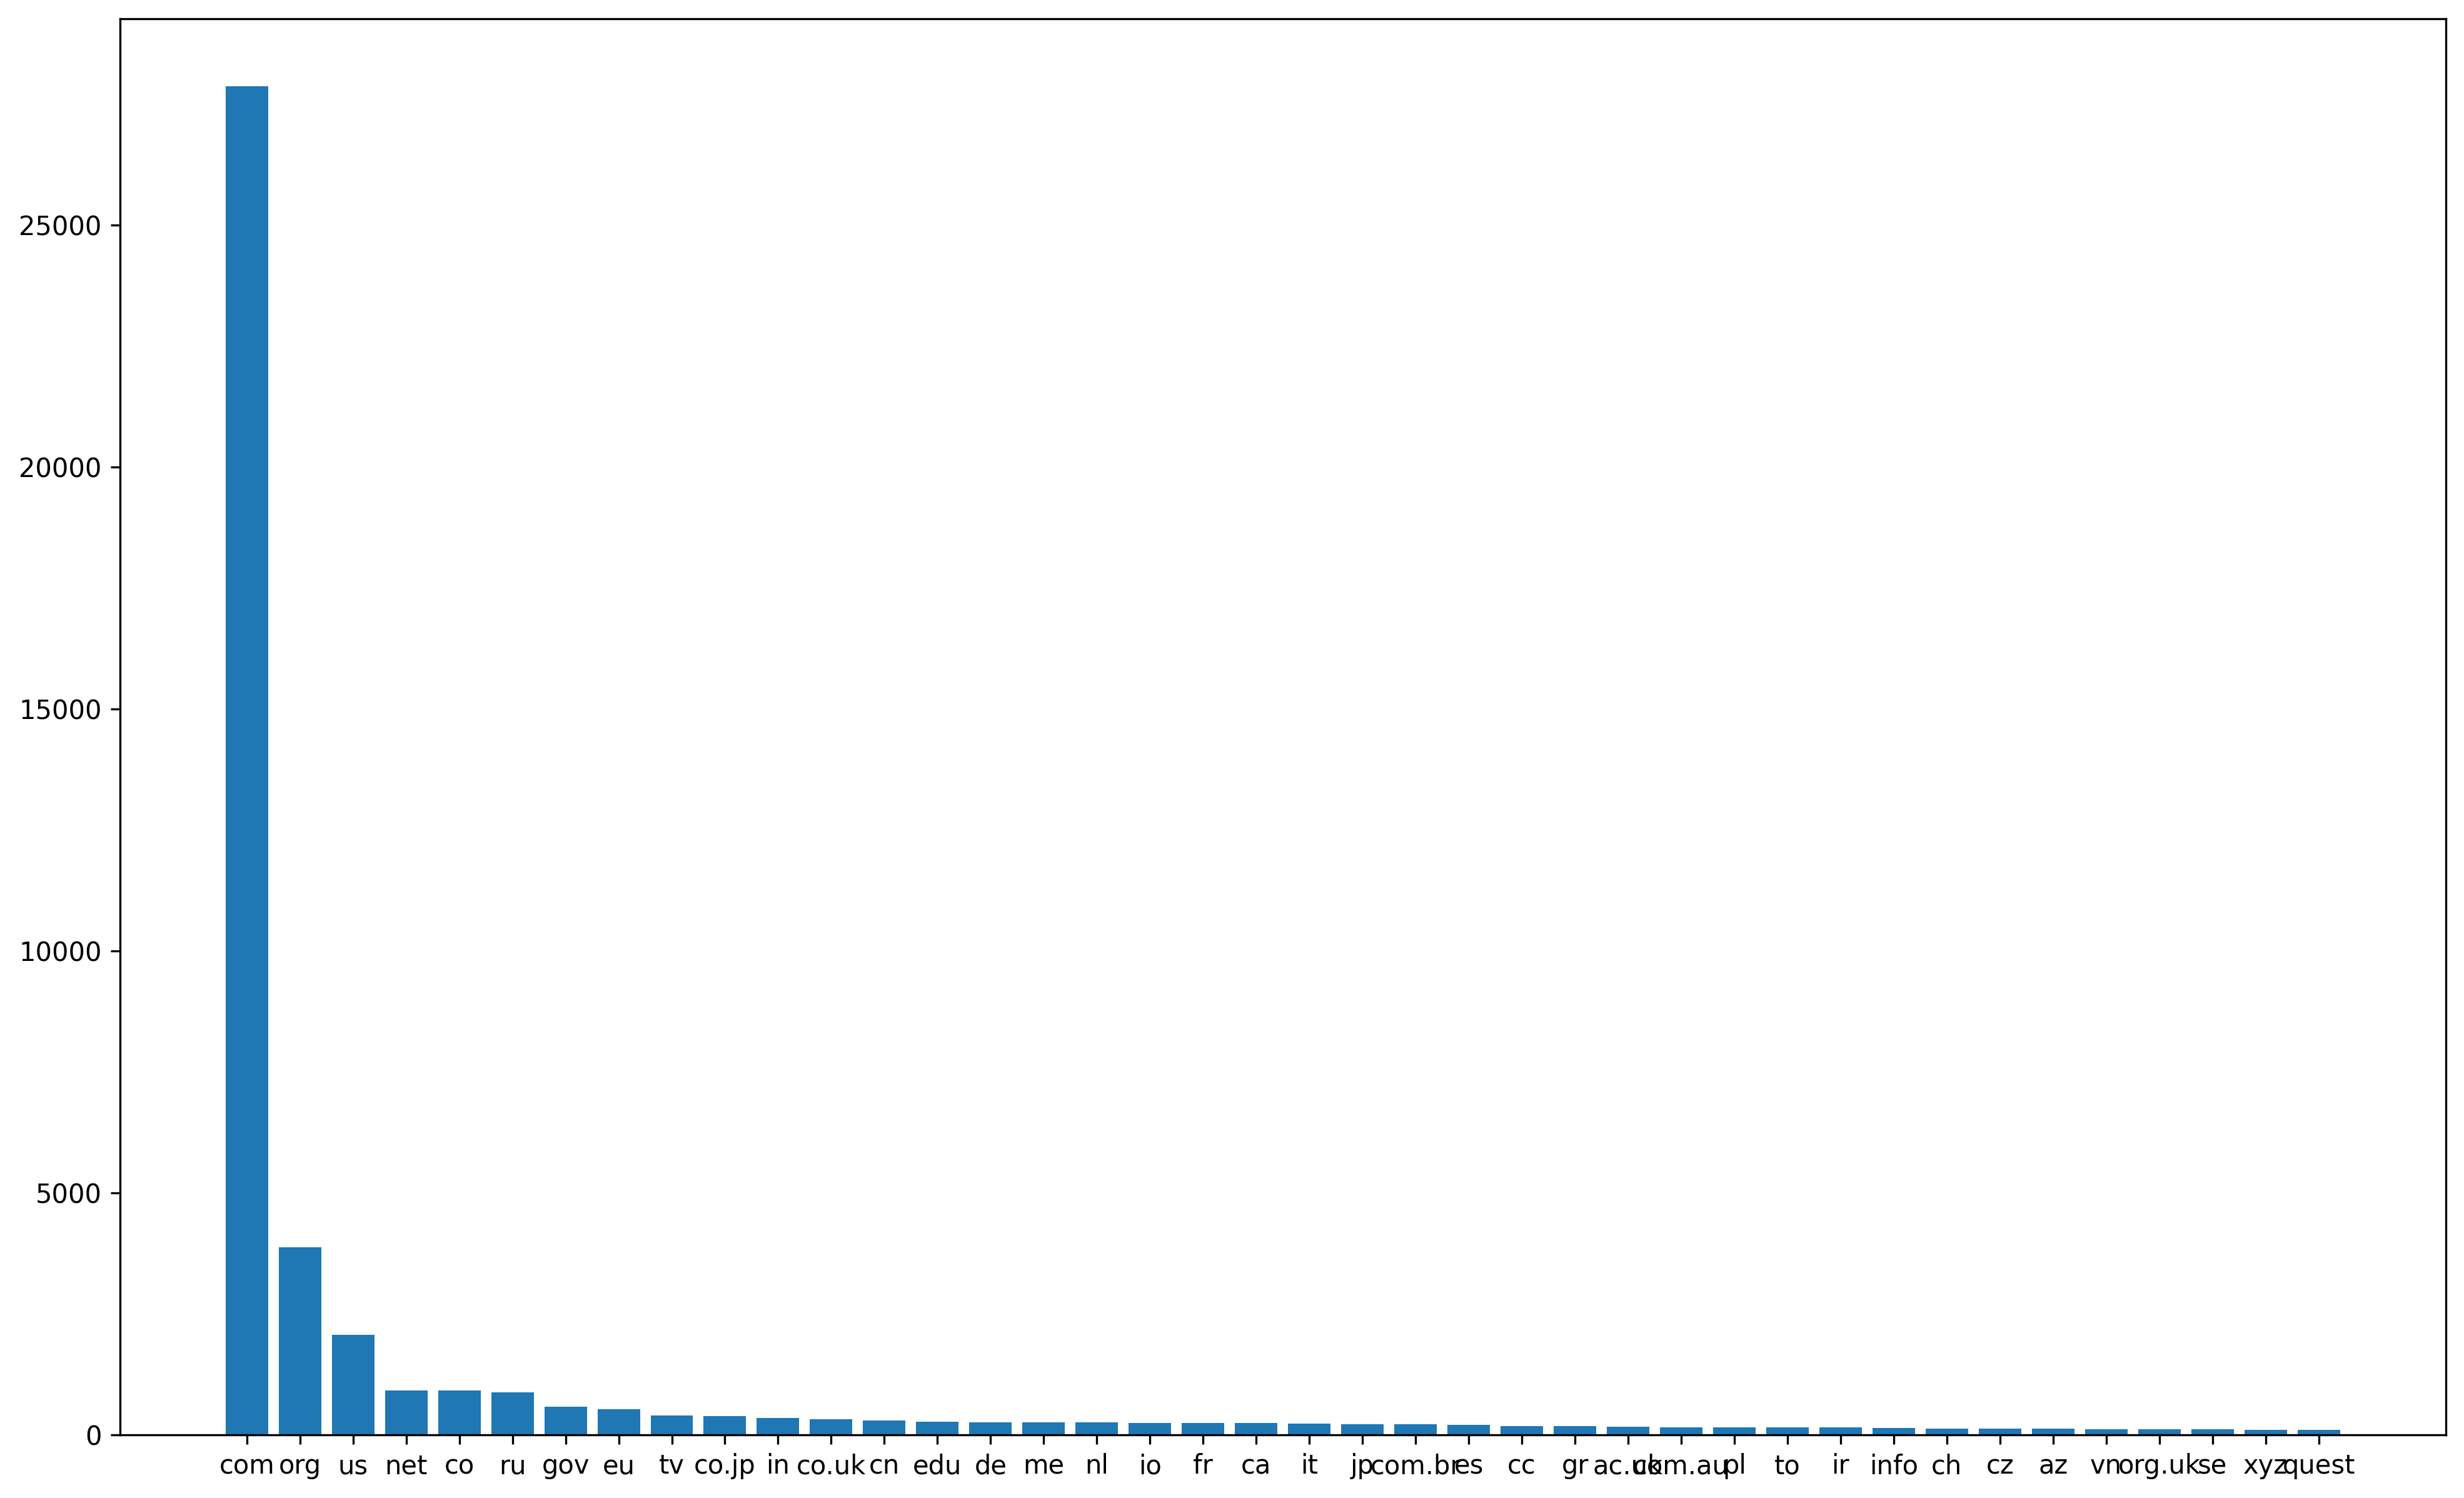

In [147]:
plt.figure(figsize=(16,10), dpi=300)
height = df1["tld"].value_counts()
bars = df1["tld"].unique()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.savefig('images/graphs/tld_overview.png')
plt.show()

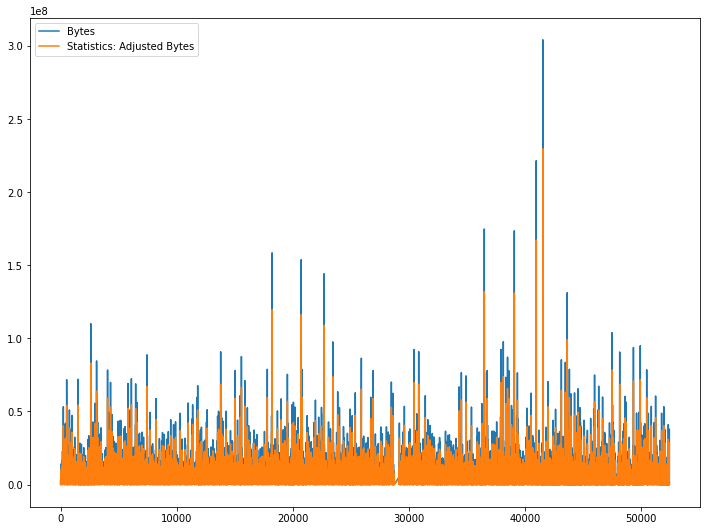

In [184]:
df[['Bytes', 'Statistics: Adjusted Bytes']].plot(figsize =(12, 9))
plt.savefig('images/graphs/bytes_and_adjusted_bytes.png')

# Regional
## Original

In [152]:
com = df[df['URL'].str.contains('.com/', regex = False)]
gov = df[df['URL'].str.contains('.gov/', regex = False)]
org = df[df['URL'].str.contains('.org/', regex = False)]
net = df[df['URL'].str.contains('.net/', regex = False)]
edu = df[df['URL'].str.contains('.edu/', regex = False)]
int = df[df['URL'].str.contains('.int/', regex = False)]
mil = df[df['URL'].str.contains('.mil/', regex = False)]
original = [com, gov, org, net, edu, int, mil]
merged_original = pd.concat(original)

In [154]:
from tld import get_tld

merged_original['tld'] = merged_original['URL'].apply(lambda x: get_tld(x))
merged_original['tld'] = merged_original['tld'].astype(str)
merged_original['tld'].value_counts()

com                   27873
org                    3868
net                    2065
edu                     921
gov                     387
int                      24
mil                       5
eu.com                    2
uk.com                    2
js.org                    1
us.com                    1
bplaced.net               1
duckdns.org               1
freedesktop.org           1
de.com                    1
mp                        1
altervista.org            1
cn.com                    1
herokuapp.com             1
pagexl.com                1
africa.com                1
pythonanywhere.com        1
us.org                    1
Name: tld, dtype: int64

<Figure size 4500x4500 with 0 Axes>

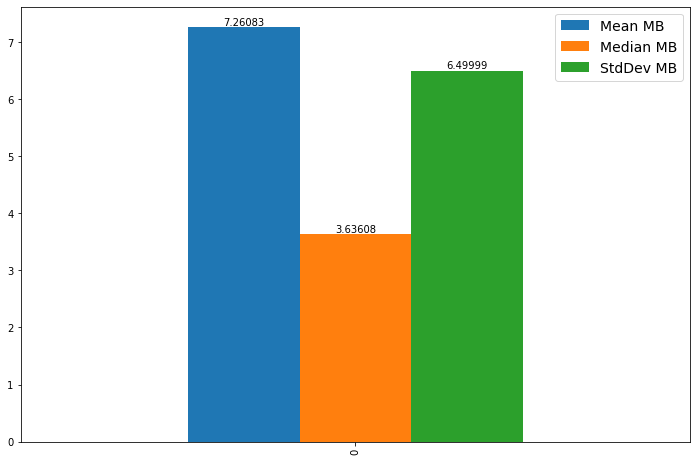

In [177]:
plt.figure(figsize=(15,15), dpi=300)
mean = (mil['Bytes'].mean() / 1e+6)
median = (mil['Bytes'].median() / 1e+6)
std = (mil['Bytes'].std() / 1e+6)
data = [mean, median, std]
dfmmms = pd.DataFrame(data)

ax = dfmmms.T.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
ax.legend(['Mean MB', 'Median MB', 'StdDev MB'], fontsize=14)
plt.savefig('images/graphs/tld_overview_bytes.png')
plt.show()

In [178]:
mil.Bytes.sum()

36304155

In [35]:
df["Statistics: CO2 Grams, Grid"].sort_values()

40633     0.000042
1594      0.000043
24137     0.000047
25294     0.000050
20385     0.000052
           ...    
18209    39.883307
39068    43.674190
36484    43.990847
40959    55.743450
41527    76.550528
Name: Statistics: CO2 Grams, Grid, Length: 50034, dtype: float64

In [36]:
df["Statistics: CO2 Grams, Grid"].median()

0.562928282521991

In [37]:
pd.pivot_table(data=df, index=['Green Hosting'], aggfunc=np.sum)

,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,"Statistics: CO2 Grams, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Grid","Statistics: CO2 Litres, Renewable",Statistics: Energy (KWG)
Green Hosting,,,,,,,,
False,104068160248,1117493.0,7.857146e+10,26198.247878,22713.051102,14571.46547,12632.999023,59.272054
True,80863090299,1341892.0,6.105163e+10,20356.574757,17648.505536,11322.32688,9816.098779,46.055599


#### For "Top/Bottom 1000"

In [38]:
first1000 = df.head(1000)
last1000 = df.tail(1000)

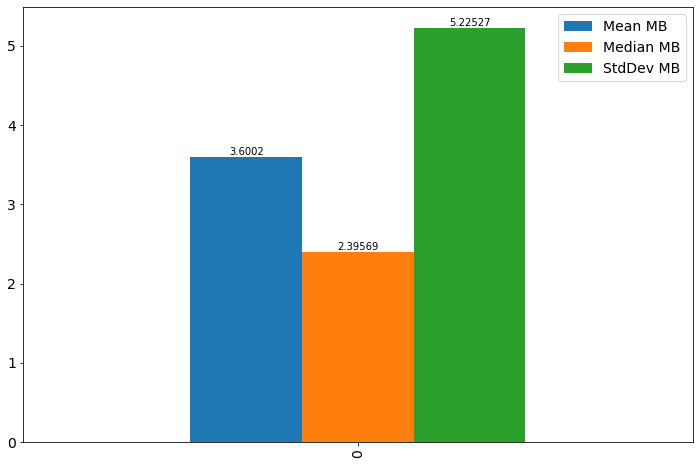

In [67]:
mean = (first1000['Bytes'].mean() / 1e+6)
median = (first1000['Bytes'].median() / 1e+6)
std = (first1000['Bytes'].std() / 1e+6)
data = [mean, median, std]
dfmmms = pd.DataFrame(data)

ax = dfmmms.T.plot(kind='bar', fontsize = 14)
for container in ax.containers:
    ax.bar_label(container)
ax.legend(['Mean MB', 'Median MB', 'StdDev MB'], fontsize = 14)
plt.savefig('images/graphs/top1000_sizes.png')
plt.show()


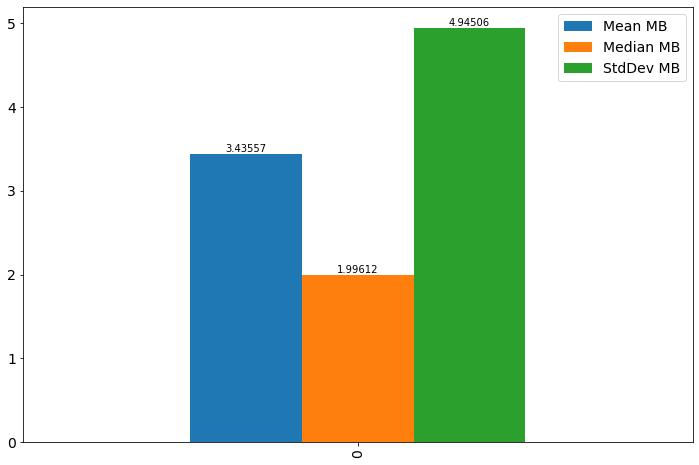

In [68]:
mean = (last1000['Bytes'].mean() / 1e+6)
median = (last1000['Bytes'].median() / 1e+6)
std = (last1000['Bytes'].std() / 1e+6)
data = [mean, median, std]
dfmmms = pd.DataFrame(data)

ax = dfmmms.T.plot(kind='bar', fontsize = 14)
for container in ax.containers:
    ax.bar_label(container)
ax.legend(['Mean MB', 'Median MB', 'StdDev MB'], fontsize = 14)
plt.savefig('images/graphs/bottom1000_sizes.png')
plt.show()

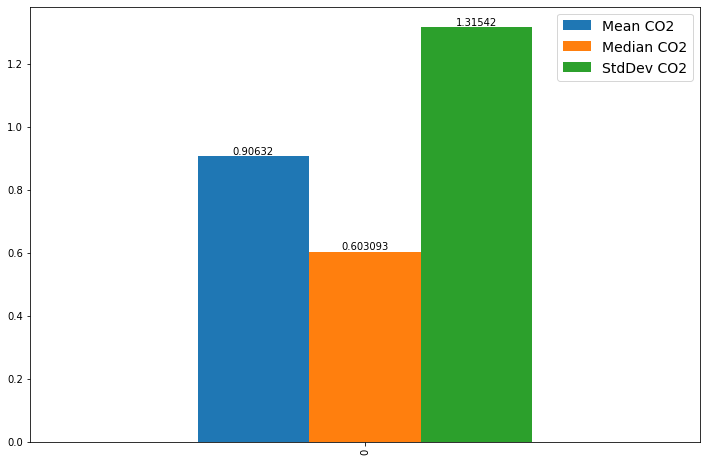

In [74]:
mean = (first1000['Statistics: CO2 Grams, Grid'].mean())
median = (first1000['Statistics: CO2 Grams, Grid'].median())
std = (first1000['Statistics: CO2 Grams, Grid'].std())
data = [mean, median, std]
dfmmms = pd.DataFrame(data)

ax = dfmmms.T.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
ax.legend(['Mean CO2', 'Median CO2', 'StdDev CO2'], fontsize = 14)
plt.savefig('images/graphs/top1000_co2s.png')
plt.show()

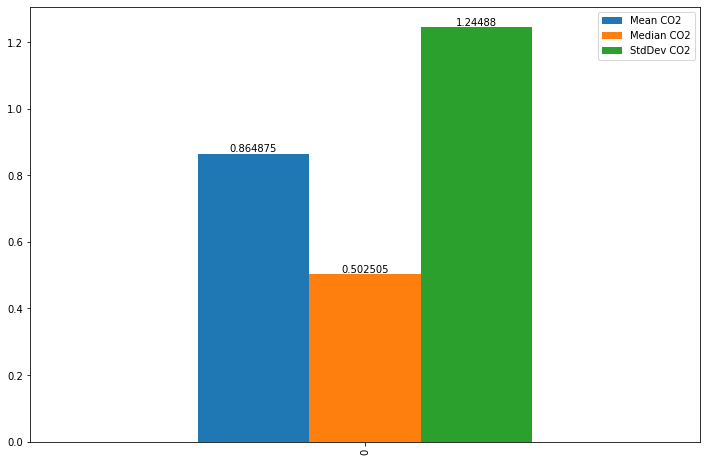

In [72]:
mean = (last1000['Statistics: CO2 Grams, Grid'].mean())
median = (last1000['Statistics: CO2 Grams, Grid'].median())
std = (last1000['Statistics: CO2 Grams, Grid'].std())
data = [mean, median, std]
dfmmms = pd.DataFrame(data)

ax = dfmmms.T.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
ax.legend(['Mean CO2', 'Median CO2', 'StdDev CO2'])
plt.savefig('images/graphs/bottom1000_co2s.png')
plt.show()

### For "Hosting Type"

In [44]:
ghtable = pd.pivot_table(data=df, index=['Green Hosting'], aggfunc=np.sum)

In [45]:
ghtable = ghtable.reindex(columns=['Bytes', 'Statistics: Energy (KWG)', 'Statistics: CO2 Grams, Grid', 'Statistics: CO2 Litres, Grid'])
ghtable

,Bytes,Statistics: Energy (KWG),"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid"
Green Hosting,,,,
False,104068160248,59.272054,26198.247878,14571.46547
True,80863090299,46.055599,20356.574757,11322.32688


In [77]:
df["Green Hosting"].value_counts()

False    25708
True     24326
Name: Green Hosting, dtype: int64

# Splitting

<AxesSubplot:>

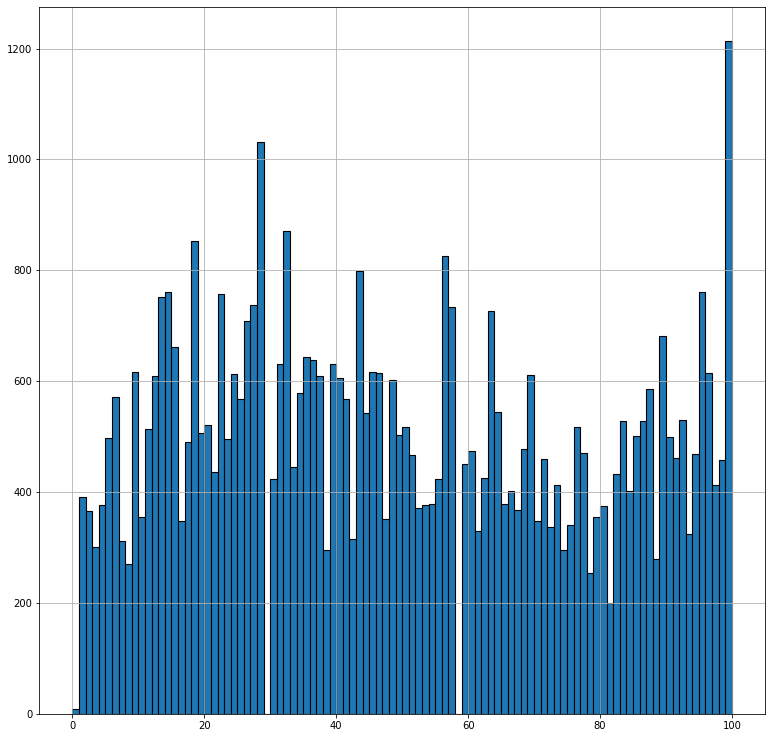

In [48]:
df["Cleaner Than %"].hist(bins=100, edgecolor='black', linewidth=1.1, figsize=(13,13))

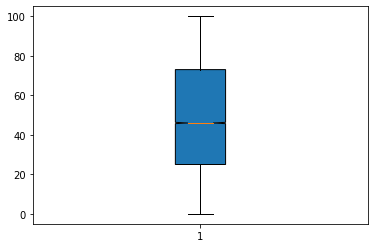

In [49]:
plt.boxplot(df['Cleaner Than %'], notch=True, patch_artist=True)
plt.show()

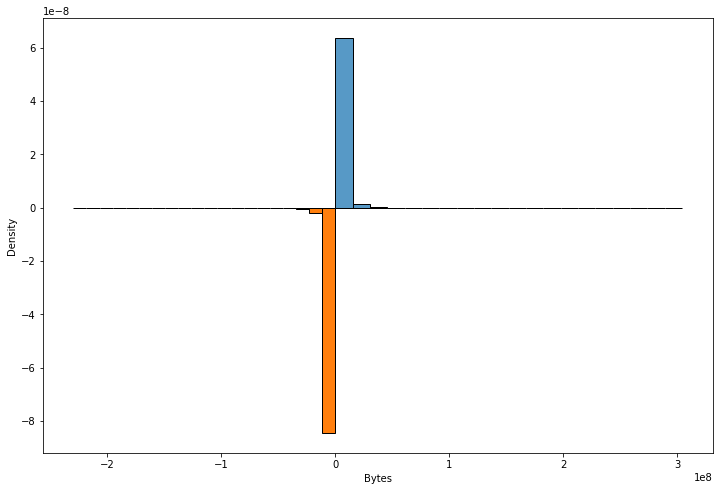

In [50]:
# libraries
import numpy as np
from numpy import linspace
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


# Fig size
plt.rcParams["figure.figsize"]=12,8

# plot histogram chart for var1
sns.histplot(x=df['Bytes'], stat="density", bins=20, edgecolor='black')

# plot histogram chart for var2
n_bins = 20
# get positions and heights of bars
heights, bins = np.histogram(df["Statistics: Adjusted Bytes"], density=True, bins=n_bins) 
# multiply by -1 to reverse it
heights *= -1
bin_width = np.diff(bins)[0]
bin_pos =( bins[:-1] + bin_width / 2) * -1

# plot
plt.bar(bin_pos, heights, width=bin_width, edgecolor='black')

# show the graph
plt.show()

# Other Charts

<AxesSubplot:>

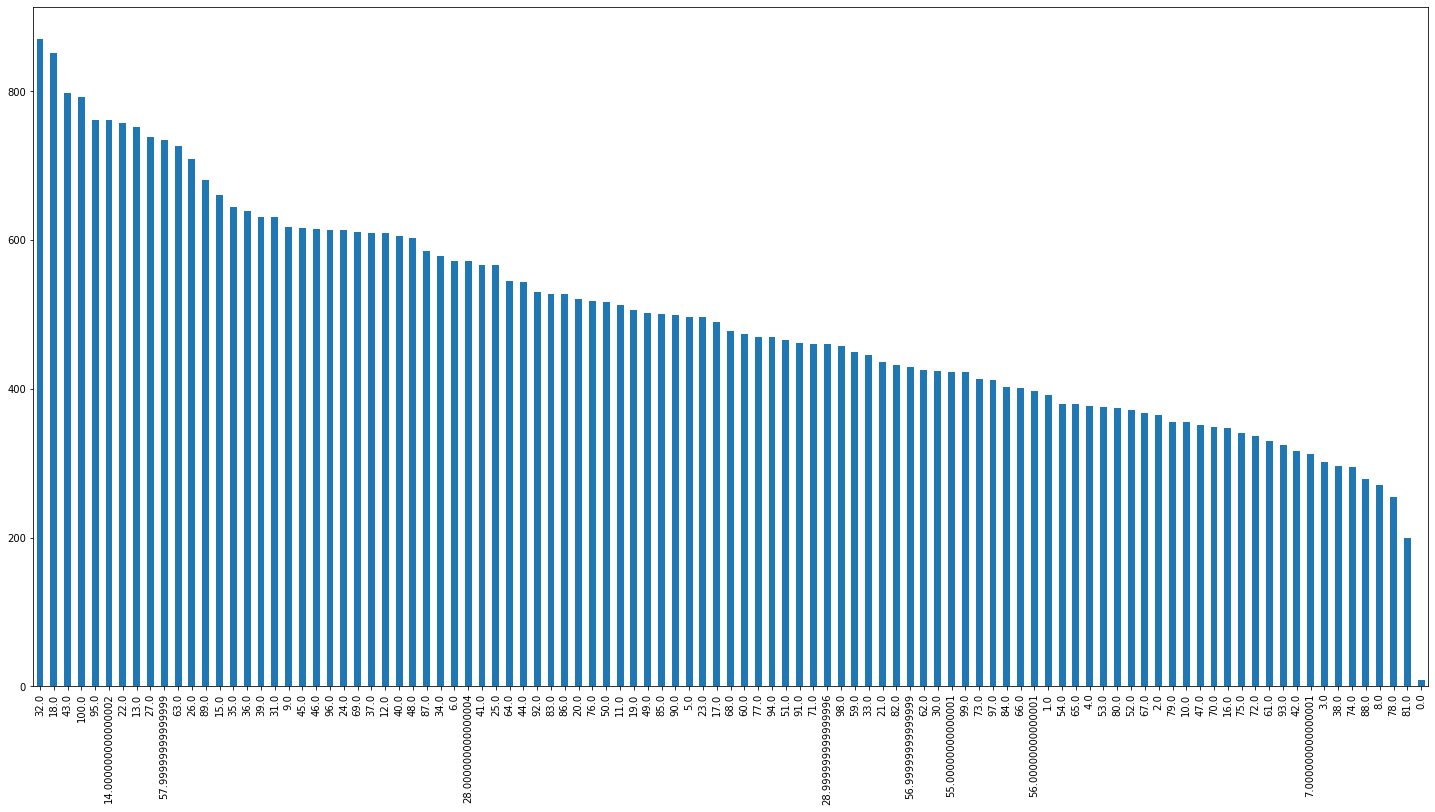

In [51]:
fig, ax = plt.subplots()
df['Cleaner Than %'].value_counts().plot(ax=ax, kind='bar', figsize=(25, 12.5))

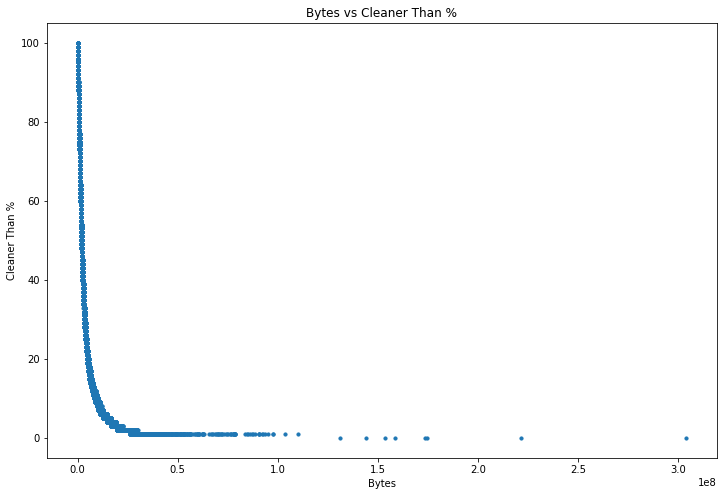

In [52]:
plt.scatter(df["Bytes"], df["Cleaner Than %"], s=10)
plt.title("Bytes vs Cleaner Than %")
plt.xlabel("Bytes")
plt.ylabel("Cleaner Than %")
plt.show()

array([[<AxesSubplot:title={'center':'Bytes'}>,
        <AxesSubplot:title={'center':'Cleaner Than %'}>,
        <AxesSubplot:title={'center':'Statistics: Adjusted Bytes'}>],
       [<AxesSubplot:title={'center':'Statistics: Energy (KWG)'}>,
        <AxesSubplot:title={'center':'Statistics: CO2 Grams, Grid'}>,
        <AxesSubplot:title={'center':'Statistics: CO2 Litres, Grid'}>],
       [<AxesSubplot:title={'center':'Statistics: CO2 Grams, Renewable'}>,
        <AxesSubplot:title={'center':'Statistics: CO2 Litres, Renewable'}>,
        <AxesSubplot:>]], dtype=object)

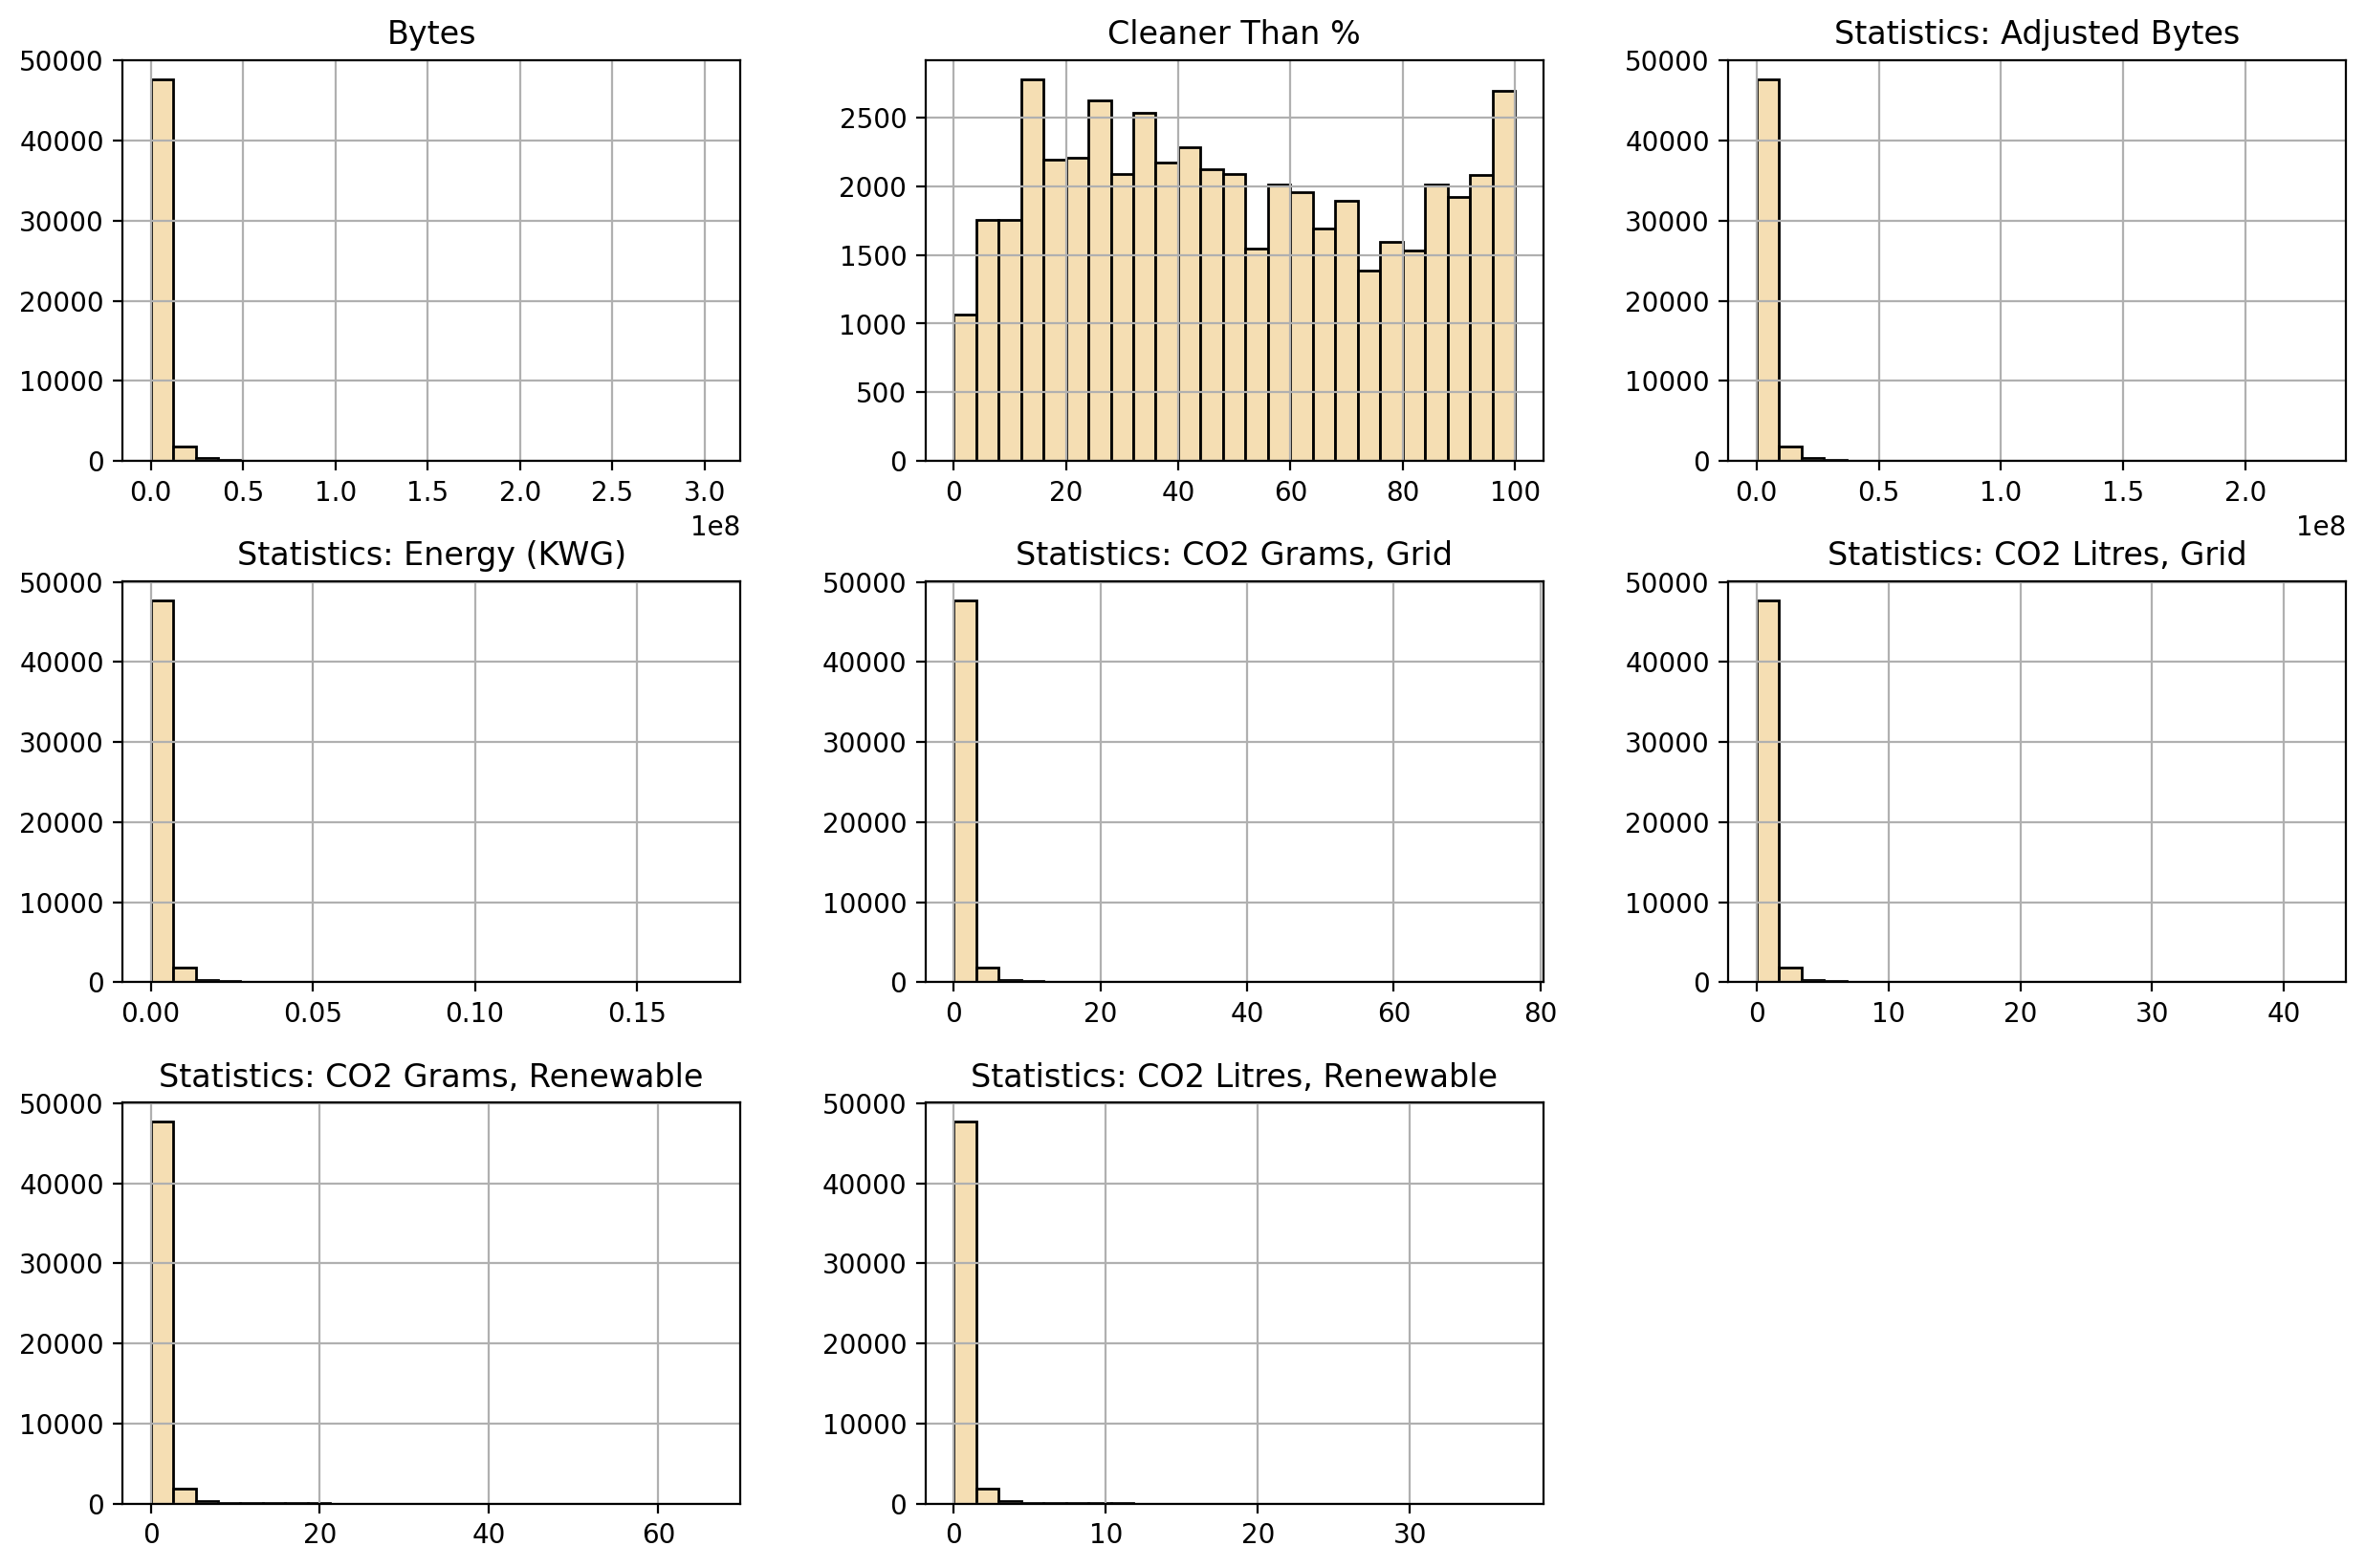

In [53]:
dfchart = df.iloc[:, :10]
fig = plt.figure(figsize=(15, 10), dpi=200)
ax = fig.gca()
dfchart.hist(ax=ax, facecolor='wheat', bins=25, edgecolor='black')

<AxesSubplot:>

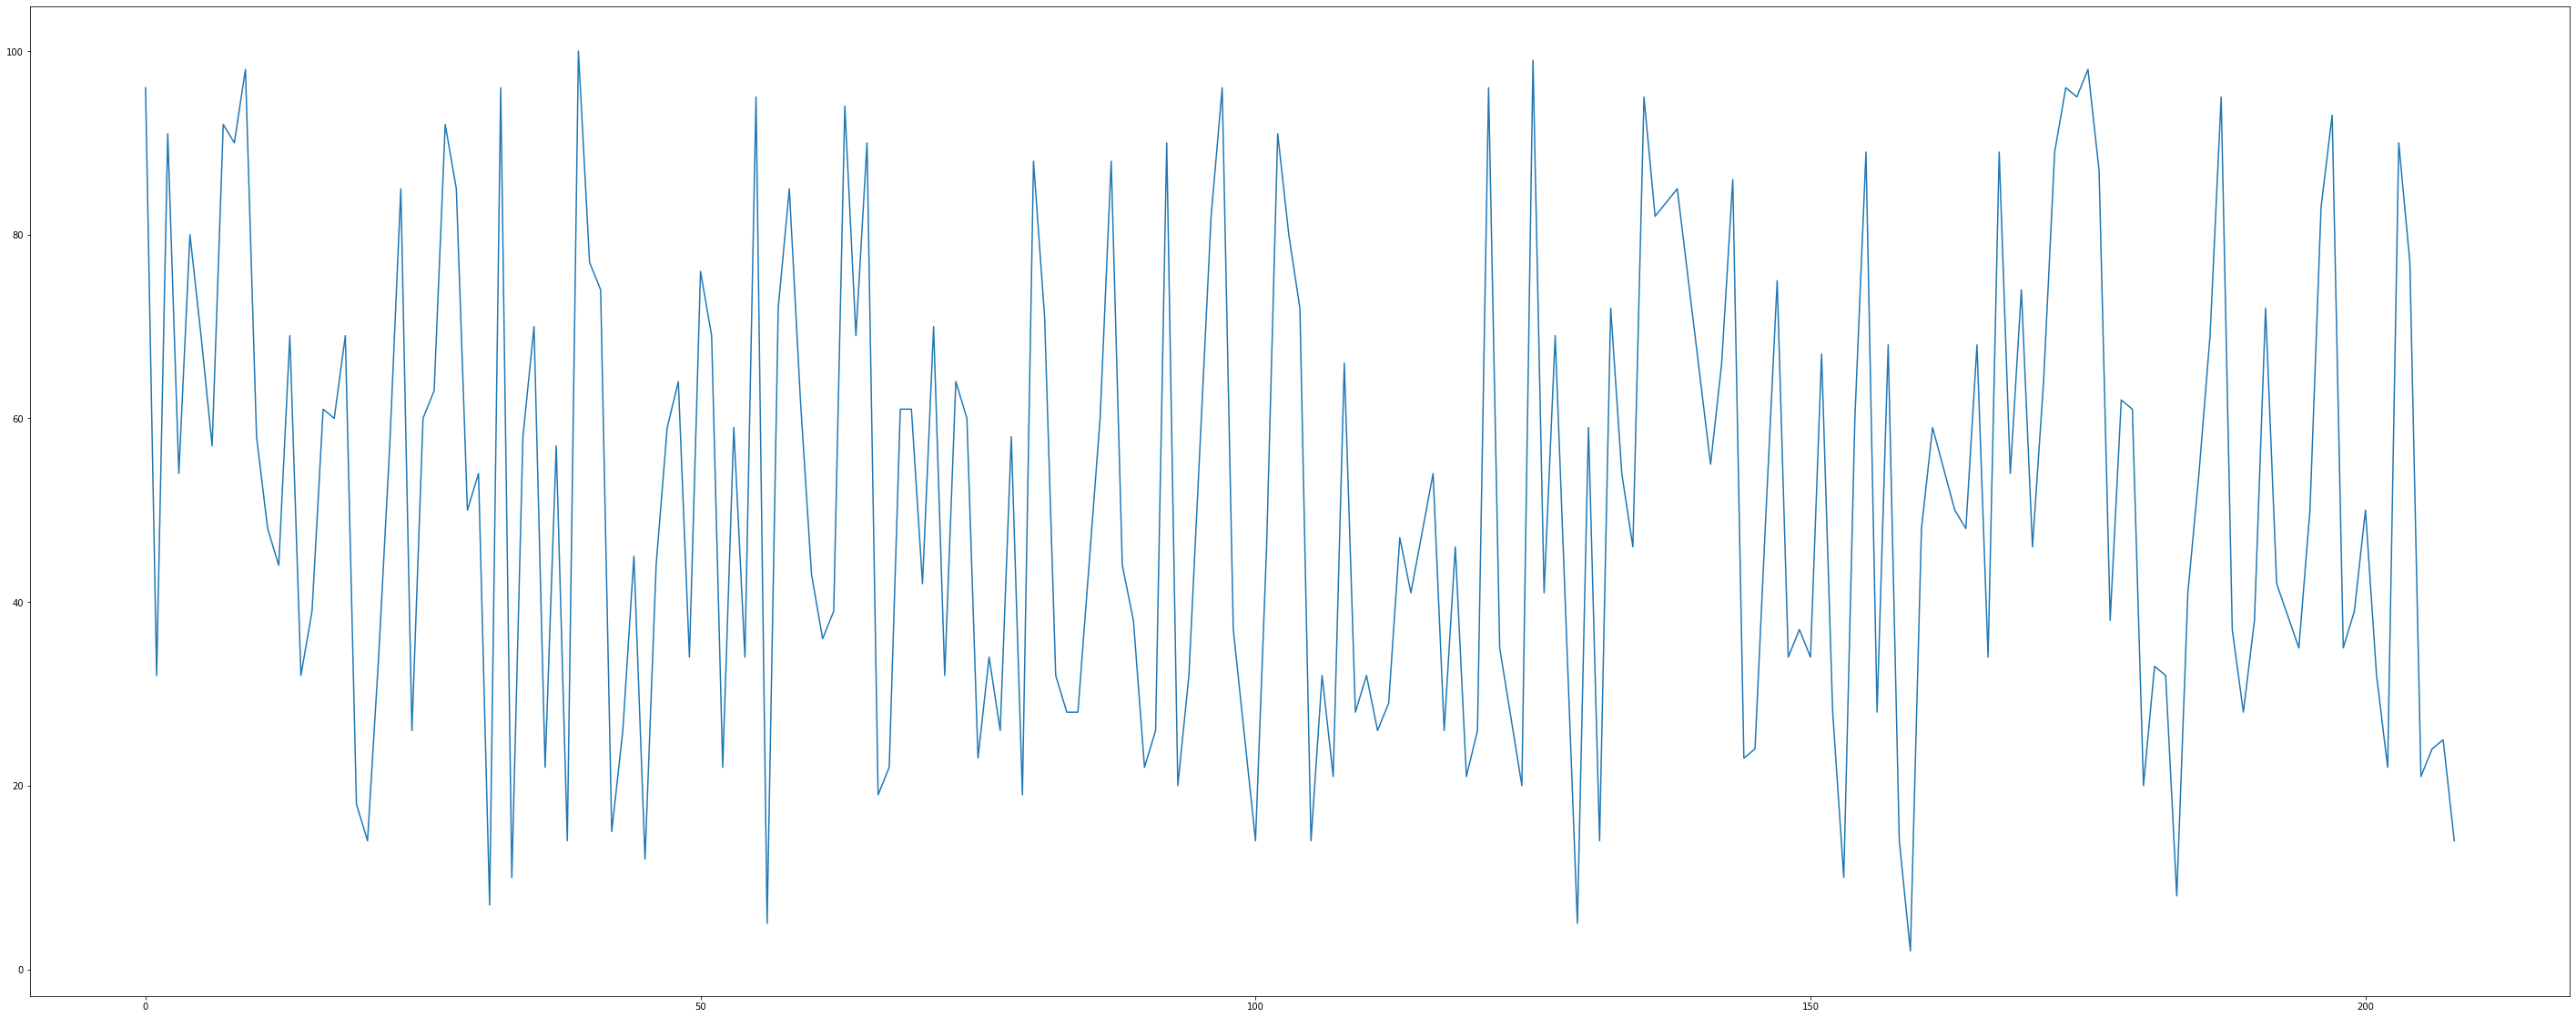

In [54]:
df['Cleaner Than %'][:200].plot.line(figsize=(50, 20))

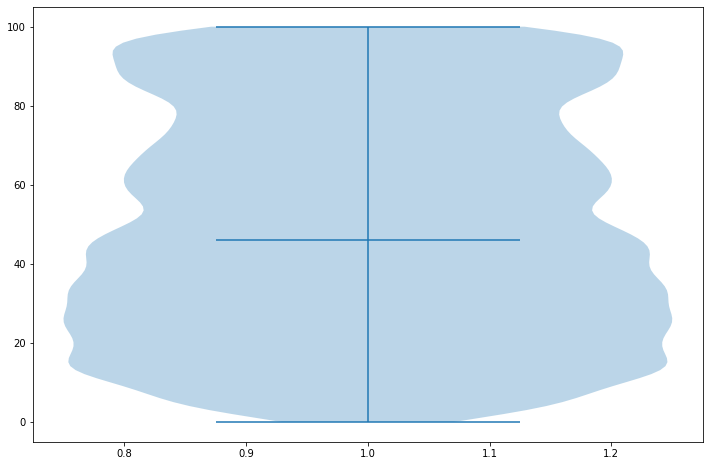

In [55]:
plt.violinplot(df['Cleaner Than %'], showmedians=True)
plt.show()